## Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('MobileTrain.csv')
pd.set_option("display.max.columns", None)#if we want to all columns 
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()
# this used for information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#   The data types we have are float and integers.
#   There are 2 features having float and 19 features having integers data types

In [4]:
# Lets have a look at the colulms

print('The columns in the dataset are:\n',df.columns.to_list())

The columns in the dataset are:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [5]:
df['clock_speed'] = df['clock_speed'].astype(int)
df['m_dep'] = df['m_dep'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   clock_speed    2000 non-null   int32
 3   dual_sim       2000 non-null   int64
 4   fc             2000 non-null   int64
 5   four_g         2000 non-null   int64
 6   int_memory     2000 non-null   int64
 7   m_dep          2000 non-null   int32
 8   mobile_wt      2000 non-null   int64
 9   n_cores        2000 non-null   int64
 10  pc             2000 non-null   int64
 11  px_height      2000 non-null   int64
 12  px_width       2000 non-null   int64
 13  ram            2000 non-null   int64
 14  sc_h           2000 non-null   int64
 15  sc_w           2000 non-null   int64
 16  talk_time      2000 non-null   int64
 17  three_g        2000 non-null   int64
 18  touch_screen   2000 non-null   int64
 19  wifi  

In [6]:
df.describe().T # this used for mathematicals tactics 

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.4950,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.0290,0.850600,0.0,0.00,1.0,2.00,3.0
dual_sim,2000.0,0.5095,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.3095,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.5215,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.0465,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.0530,0.224090,0.0,0.00,0.0,0.00,1.0
mobile_wt,2000.0,140.2490,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.5205,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Missing Values Visualization

missingno module helps to visulaize the nan values in the dataset.Since it dont have null values so it not showing anything in the graph.

In [9]:
print (df.isnull().any())

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool


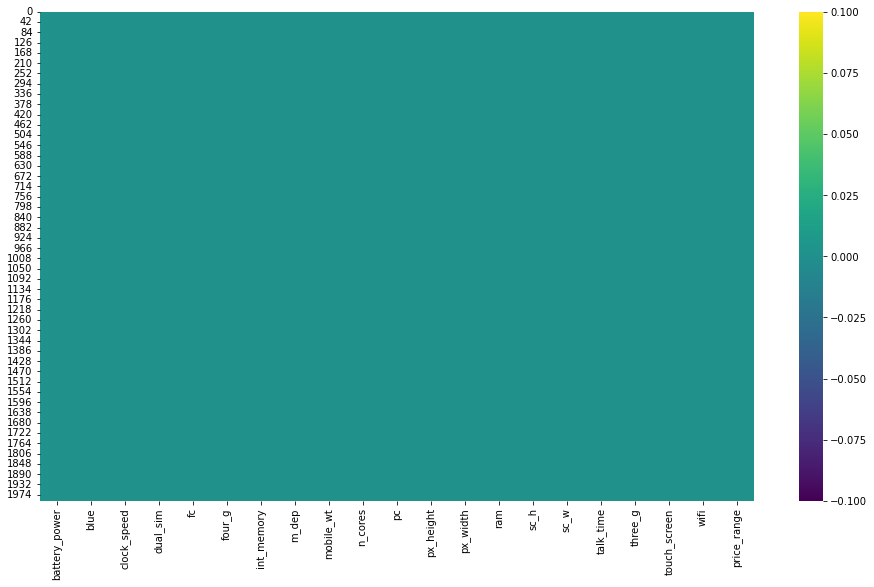

In [10]:
plt.figure(figsize=(16,9)) #This used for to check the missing value graphically using heatmap 
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

### Correlation matrix

Text(0.5, 1.0, 'Heatmap')

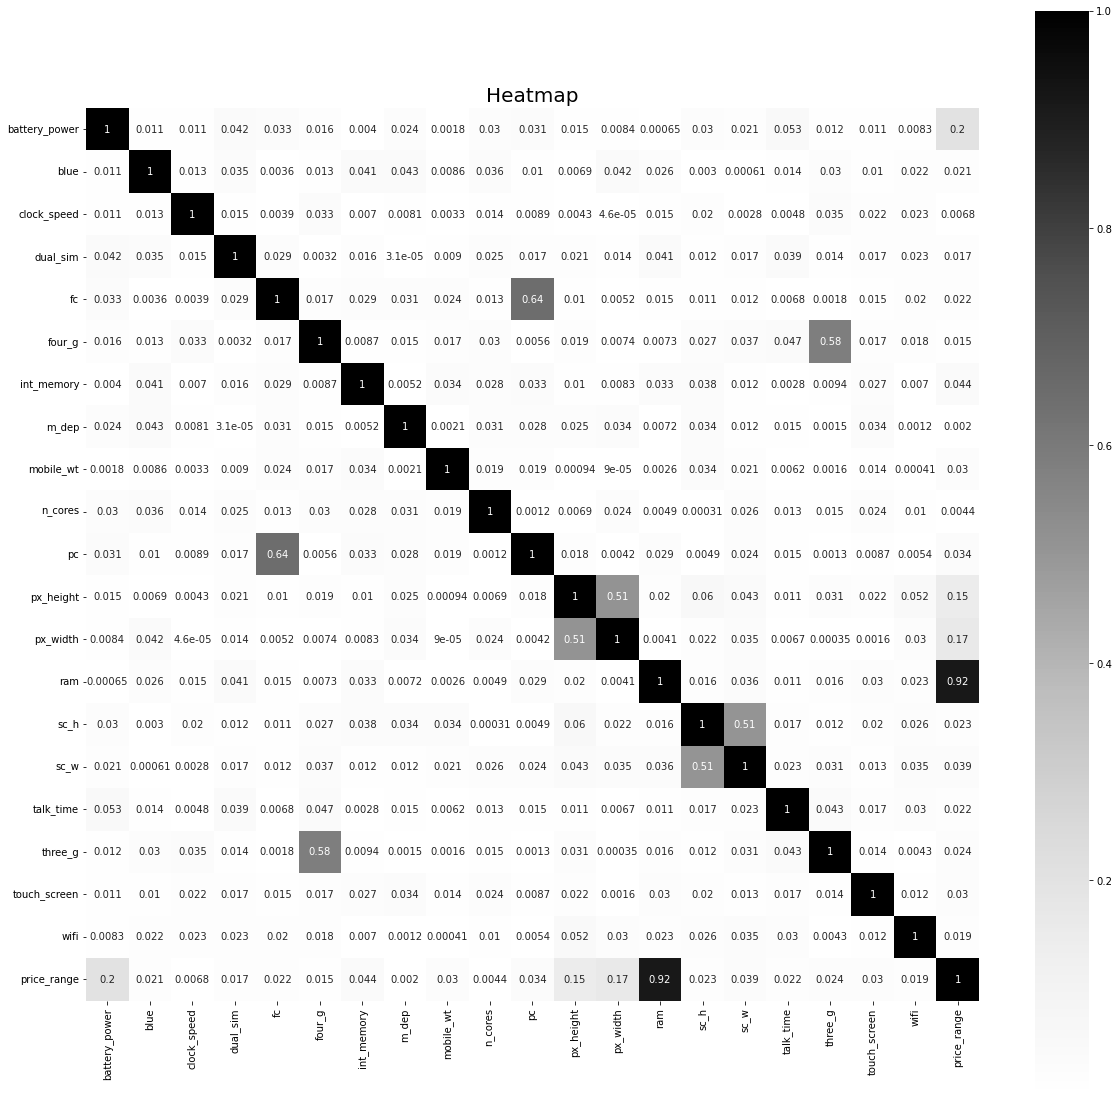

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='Greys',square=True)
plt.title('Heatmap',fontsize=20)

* Points to note from above heatmap:

1) pc is correlated with fc.

2) three_g and four_g are moderately correlated.

3) sc_h and sc_w are moderately correlated. We will try to change them into a single variable.

4) px_width and px_height are moderately correlated. We will try to change them into a single variable.

5) ram is highly correlated with our price range. May be one the most important factor in determining the price.

# n_cores and m_dep V/S price_range 

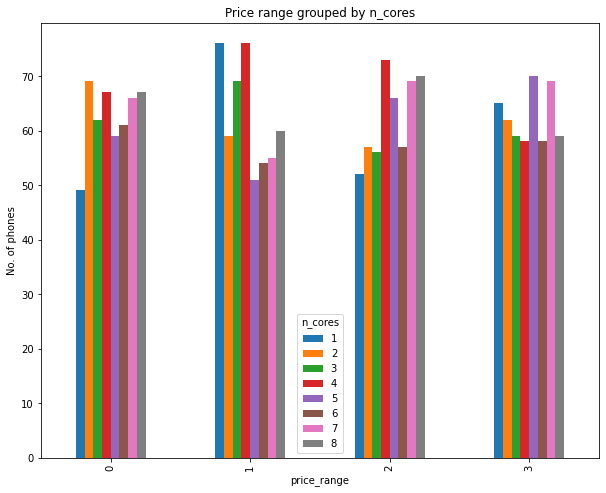

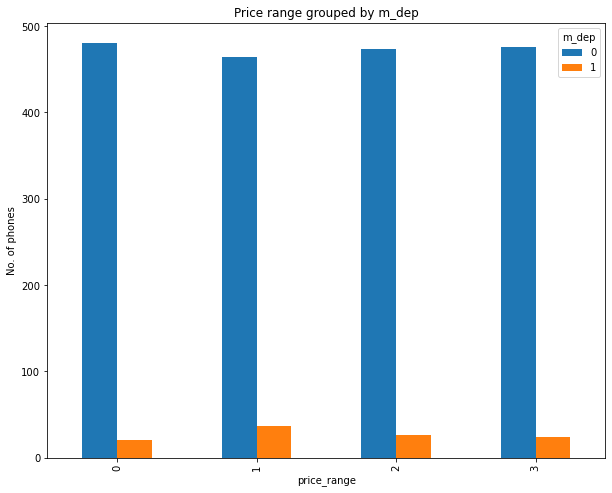

In [13]:
# Grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

# Blue, 4_g,3_g, dual_sim, wifi, touch_screen V/S price_range

Text(0, 0.5, 'No. of phones')

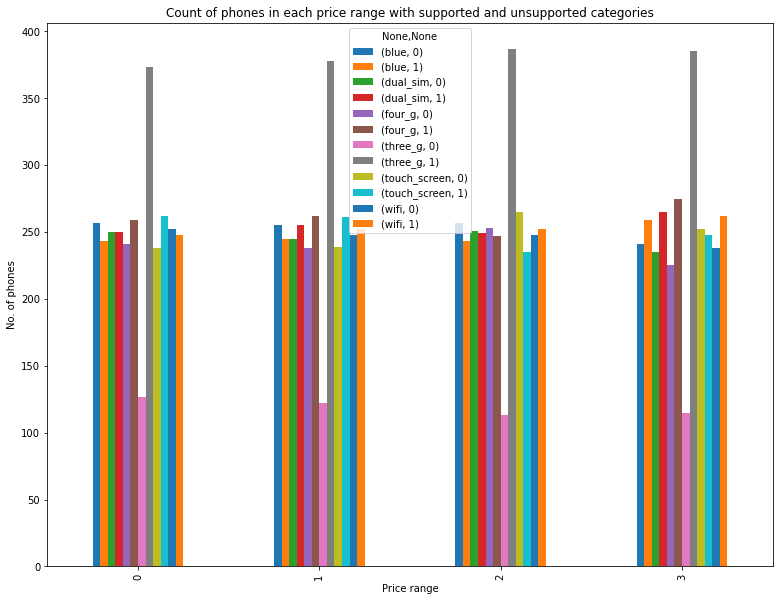

In [14]:
# Grouping price range with Blue, four_g, three_g, dual_sim, wifi, touch_screen and visualizing 

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones in each price range with supported and unsupported categories')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range'>

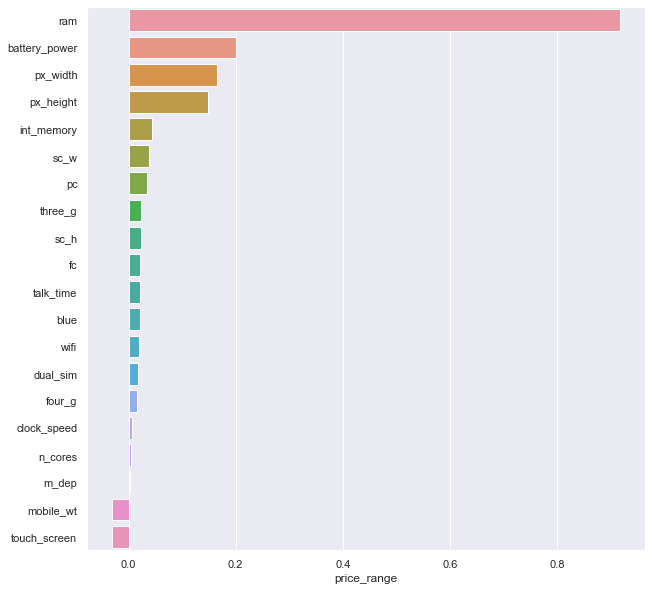

In [15]:
sns.set(rc = {'figure.figsize':(10,10)})
correlation = correl['price_range'].sort_values(ascending = False)
corrpric = correlation[1:]
sns.barplot(corrpric,corrpric.index)

### Data Visualization

 # Point plot shows us the estimate of central tendency of numerical type variables with estimate error.

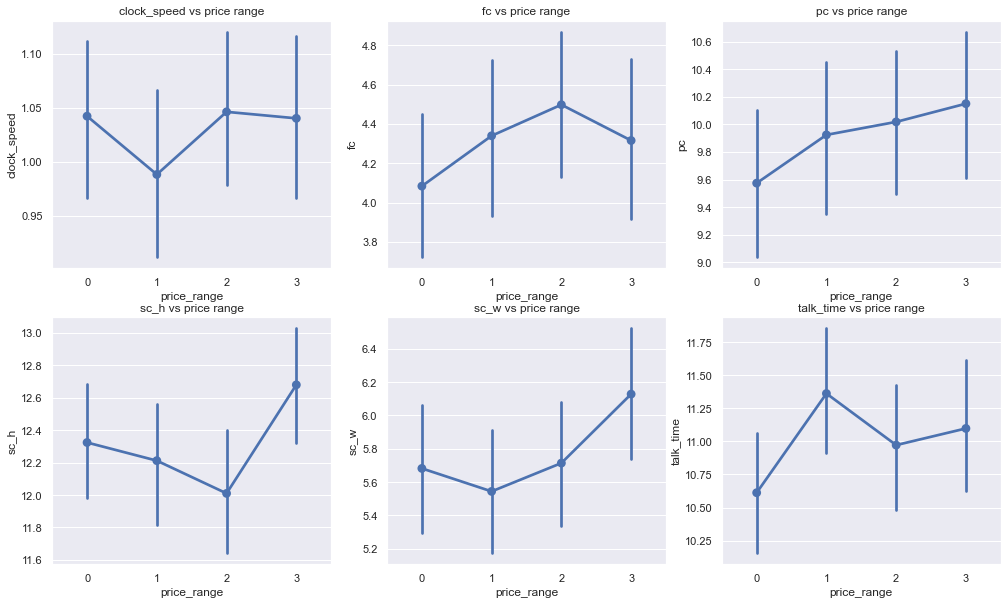

In [16]:
# Visualizing price range grouped by these variables using pointplot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.figure(figsize=(17,10))
for index,item in enumerate(list1):
  plt.subplot(2,3,index+1)
  sns.pointplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')


* For low range price(0), the clock speed is high.

* Price range is increasing with increase in front camera and primary camera megapixel.

* Screen height and width decrease initially for increase in price range but then increses.

* Talk time is higher for high range phones comparatively.

# Int_memory, mobile_wt V/S price_range

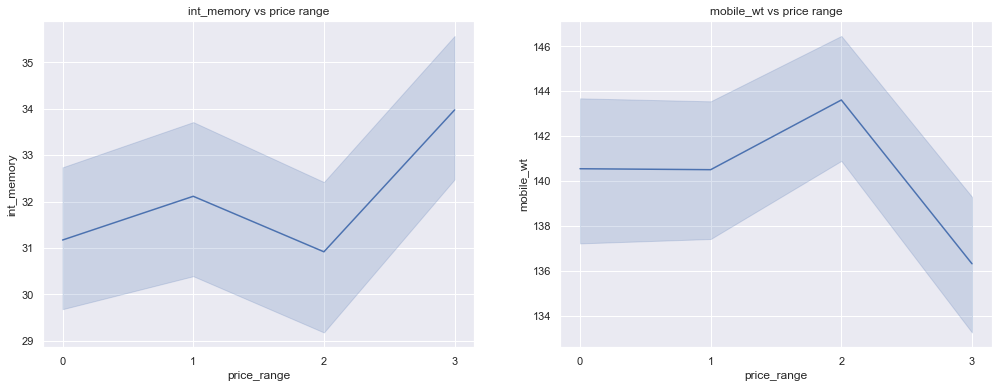

In [17]:
# Visualizing price range grouped by these variables using lineplot

list1=['int_memory','mobile_wt']
plt.figure(figsize=(17,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,2,index+1)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.xticks(xtick)
  plt.title(f'{item} vs price range')

* There is drastic increase in internal memory for very high prices.

* Also there is drastic decrease in mobile weight for very high prices

# Battery_power, px_height, px_width, ram V/S price_range

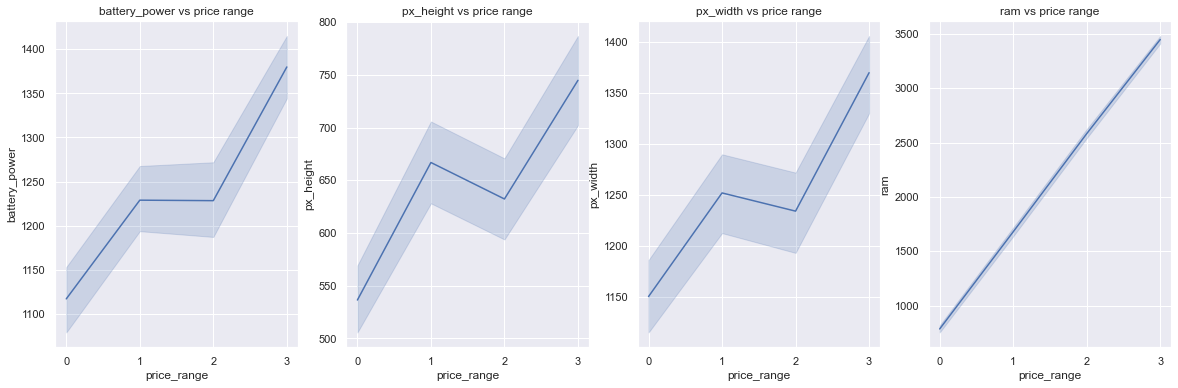

In [18]:
# Visualizing price range grouped by these variables using lineplot

list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.lineplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* It looks like the values of these variables are in increasing trend with increase in prices.
* Ram is having a direct impact. Higher ram is equal to higher prices.

In the mobile dataset ram has high correlation so i want to check the ram range for each price here swarm plot shows the range.For high price the ram is quite high

data exploration on features dual_sim, fc, four_g, three_g, wifi and touch screen

### Outlier detection

Outliers are checked for continuous features in the dataset.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\si

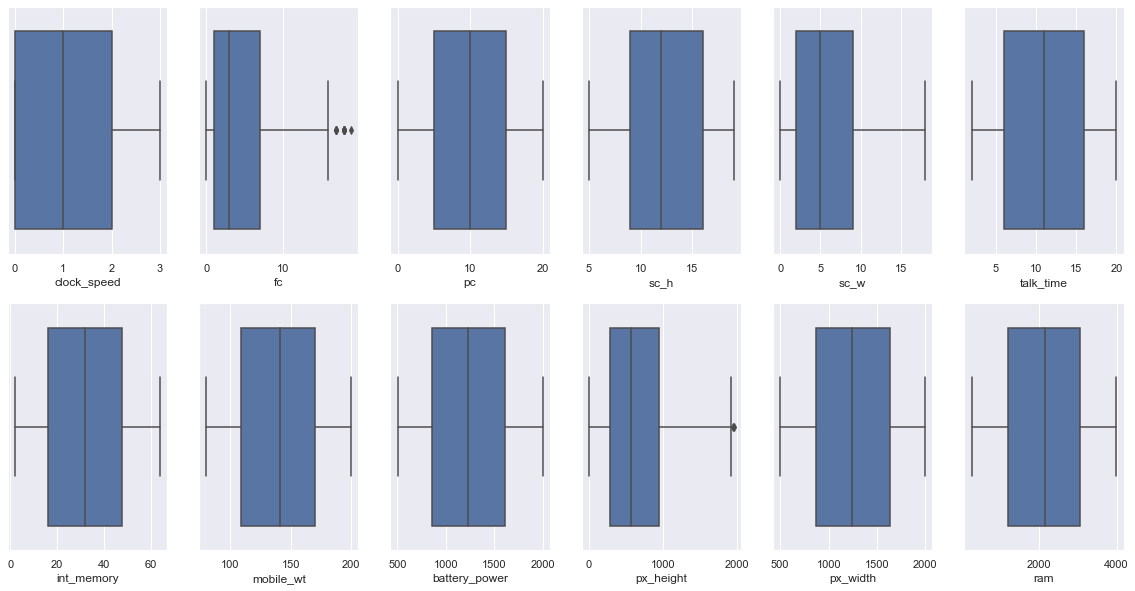

In [19]:
list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

* Great! It looks like we dont have any outliers except in fc which can be considered negligible as they are not that far away from the maximum value.

### Importing the Test data 

In [20]:
df2 = pd.read_csv('MobileTest.csv')

### Splitting Data 

In [21]:
x = df.drop(columns = 'price_range').values
y = df.iloc[: , -1:].values
print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (2000, 20)
shape of y= (2000, 1)


# Tain_Test_Spliting 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 51)

print("shape of x_train =", x_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of x_test=",x_test.shape)
print("shape of y_test=",y_test.shape)

shape of x_train = (1500, 20)
shape of y_train= (1500, 1)
shape of x_test= (500, 20)
shape of y_test= (500, 1)


### Feature Scaling 

In [23]:
#standarization 
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(x_train,y_train)

array([[-1.61203094, -0.97108454, -0.03663064, ...,  0.5557882 ,
         0.97367959,  0.97888944],
       [-0.65709524,  1.02977646, -1.20569376, ...,  0.5557882 ,
         0.97367959, -1.02156582],
       [-0.39770165, -0.97108454,  1.13243247, ...,  0.5557882 ,
        -1.0270319 , -1.02156582],
       ...,
       [ 0.08206173, -0.97108454,  2.30149558, ...,  0.5557882 ,
         0.97367959,  0.97888944],
       [-0.58363865, -0.97108454, -0.03663064, ...,  0.5557882 ,
        -1.0270319 ,  0.97888944],
       [-0.32654057, -0.97108454, -1.20569376, ...,  0.5557882 ,
         0.97367959,  0.97888944]])

# SVM

In [24]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train accuracy: 0.952
test accuracy: 0.954


In [25]:
svmc = confusion_matrix(y_test, y_pred )
svmc

NameError: name 'y_pred' is not defined

# Decision Tree
Decision tree is a type of supervised learning algorithm that can be used for both regression and classification problems. The algorithm uses training data to create rules that can be represented by a tree structure. Like any other tree representation, it has a root node, internal nodes, and leaf nodes.

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0,max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

In [ ]:
y_pred = dt.predict(x_test)

Confusion matrices are used to visualize important predictive analytics like recall, specificity, accuracy, and precision. Confusion matrices are useful because they give direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.

In [ ]:
dtc = confusion_matrix(y_test, y_pred )
dtc

In [ ]:
resultdt = classification_report(y_test,y_pred)

# print the result
print(resultdt)

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(dt, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

### Logistic Regression

Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression(solver='liblinear')
logmodel.fit(x_train,y_train)

In [ ]:
y_pred = logmodel.predict(x_test)

In [ ]:
logmodel.score(x_test,y_test)

In [ ]:
lrc = confusion_matrix(y_test, y_pred)
lrc

In [ ]:
resultlr = classification_report(y_test,y_pred)

# print the result
print(resultlr)

### Random forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(max_depth=8, random_state=51)


In [ ]:
Random.fit(x_train, y_train)

In [ ]:
y_pred = Random.predict(x_test)

In [ ]:
Random.score(x_test,y_test)

In [ ]:
rfc = confusion_matrix(y_test, y_pred)
rfc

In [ ]:
resultrandom = classification_report(y_test,y_pred)
print(resultrandom)

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
from sklearn.model_selection import cross_validate
#model = VotingRegressor
crossval = cross_validate(Random, x, y, cv=10, scoring = "r2" , return_train_score=True)
crossval['test_score'].mean(), crossval['train_score'].mean()

### KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4 )
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

In [ ]:
knn.score(x_test,y_test)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
knnc = confusion_matrix(y_test, y_pred)
knnc

In [ ]:
resultknn = classification_report(y_test,y_pred)
print(resultknn)

# c## Ranking

### Ranking According to Price Range 

In [ ]:
df["rank_by_price"] = df["price_range"].rank()
dt1 = df
dt1.head()

In [ ]:
dt1["rank_by_price"] = dt1["rank_by_price"].sort_values()
dt1

### Sorting Ranking Dataset 

In [ ]:
dt1.sort_values(by=["rank_by_price"])

In [ ]:
dt1.head()

### Ranking on all the features using rank()

In [ ]:
dt2 = pd.read_csv(r"MobileTrain.csv")
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

### Ranking all the features separately to correct output

In [ ]:
b = dt2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

In [ ]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2